In [93]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [3]:
temp_df = pd.read_csv('IMDB Dataset.csv')

In [13]:
df = temp_df.iloc[:1000]

In [14]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [8]:
df.iloc[0]['review']

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [9]:
# A well balanced dataframe
df['sentiment'].value_counts()

positive    501
negative    499
Name: sentiment, dtype: int64

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
type(df)

pandas.core.frame.DataFrame

In [17]:
import re
def remove_tags(raw_text):
    cleaned_text = re.sub(re.compile('<.*?>'), '', raw_text)
    return cleaned_text

In [18]:
df['review'] = df['review'].apply(remove_tags)

In [19]:
df['review'] = df['review'].apply(lambda x:x.lower())

In [22]:
from nltk.corpus import stopwords

sw_list = stopwords.words('english')

df['review'] = df['review'].apply(lambda x:" ".join([item for item in x.split() if item not in sw_list]))

In [23]:
df['review'].iloc[0]

"one reviewers mentioned watching 1 oz episode hooked. right, exactly happened me.the first thing struck oz brutality unflinching scenes violence, set right word go. trust me, show faint hearted timid. show pulls punches regards drugs, sex violence. hardcore, classic use word.it called oz nickname given oswald maximum security state penitentary. focuses mainly emerald city, experimental section prison cells glass fronts face inwards, privacy high agenda. em city home many..aryans, muslims, gangstas, latinos, christians, italians, irish more....so scuffles, death stares, dodgy dealings shady agreements never far away.i would say main appeal show due fact goes shows dare. forget pretty pictures painted mainstream audiences, forget charm, forget romance...oz mess around. first episode ever saw struck nasty surreal, say ready it, watched more, developed taste oz, got accustomed high levels graphic violence. violence, injustice (crooked guards who'll sold nickel, inmates who'll kill order g

In [24]:
import gensim

In [25]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [26]:
story = []
for doc in df['review']:
    raw_sent = sent_tokenize(doc)
    for sent in raw_sent:
        story.append(simple_preprocess(sent))
    

In [51]:
model = gensim.models.Word2Vec(
    window=10,
    min_count=2
)

In [52]:
model.build_vocab(story)

In [53]:
model.train(story, total_examples=model.corpus_count, epochs=model.epochs)

(557248, 623495)

In [54]:
len(model.wv.index_to_key)

9395

In [55]:
def document_vector(doc):
    # remove out-of-vocabulary words
    doc = [word for word in doc.split() if word in model.wv.index_to_key]
    #print(doc)
    return np.mean(model.wv[doc], axis=0)

In [56]:
document_vector('i am fine')

array([-0.13555868,  0.23294604,  0.03720079,  0.00626794, -0.00884625,
       -0.30959985,  0.14061372,  0.518249  , -0.1882524 , -0.16297986,
       -0.09452913, -0.3800928 , -0.00808278,  0.11877462,  0.04867975,
       -0.2389952 ,  0.0123973 , -0.35765338,  0.05854405, -0.464594  ,
        0.11495224,  0.13584806,  0.10949345, -0.04202034, -0.09922586,
       -0.0153768 , -0.15548481, -0.05880383, -0.15655272,  0.01559652,
        0.2559297 ,  0.04952198,  0.01802463, -0.04917217, -0.08720283,
        0.19946167,  0.08880276, -0.13088885, -0.11111315, -0.41140032,
        0.02122429, -0.2283329 , -0.0306089 , -0.01497692,  0.15000628,
       -0.15017687, -0.15764588, -0.03392684,  0.09684531,  0.19662073,
        0.05819043, -0.23737146, -0.16102467, -0.11132935, -0.16065028,
        0.07818084,  0.17002934, -0.00568732, -0.14222999,  0.10417639,
        0.05295548,  0.17745891, -0.00973294, -0.02661448, -0.24515444,
        0.22170232,  0.05664327,  0.07589075, -0.25264332,  0.22

In [38]:
from tqdm import tqdm

In [57]:
X = []
for doc in tqdm(df['review'].values):
    X.append(document_vector(doc))

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 84.26it/s]


In [58]:
X = np.array(X)

In [59]:
X.shape

(1000, 100)

In [60]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

y = encoder.fit_transform(df['sentiment'])

In [61]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [66]:
rf = RandomForestClassifier(random_state=2)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.605

In [67]:
from sklearn.metrics import confusion_matrix

In [68]:
confusion_matrix(y_test,y_pred)

array([[65, 49],
       [30, 56]], dtype=int64)

In [71]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred1 = log_reg.predict(X_test)
accuracy_score(y_test,y_pred1)

0.465

In [75]:
from sklearn.model_selection import cross_val_score,cross_validate

In [79]:
cross_val_score(rf,X_train,y_train,cv=5,scoring='precision')

array([0.5875    , 0.57894737, 0.61458333, 0.54651163, 0.56410256])

In [80]:
from sklearn.svm import SVC

In [81]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred2 = rbf_classifier.predict(X_test)

In [82]:
accuracy_score(y_test,y_pred2)

0.43

In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
scaler=StandardScaler()
scaler.fit(X)

StandardScaler()

In [87]:
scaled_data=scaler.transform(X)

In [85]:
from sklearn.decomposition import PCA

In [86]:
pca=PCA(n_components=2)

In [88]:
pca.fit(scaled_data)

PCA(n_components=2)

In [89]:
x_pca=pca.transform(scaled_data)

In [129]:
x_pca

array([[  9.956097  ,   0.14741322],
       [ -0.15999977,  -1.4357312 ],
       [ -1.3261349 ,  -0.14584365],
       ...,
       [  5.598193  ,   0.841246  ],
       [-12.515343  ,   0.2981233 ],
       [  9.158686  ,  -0.18573633]], dtype=float32)

In [91]:
print(scaled_data.shape)
print(x_pca.shape)

(1000, 100)
(1000, 2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


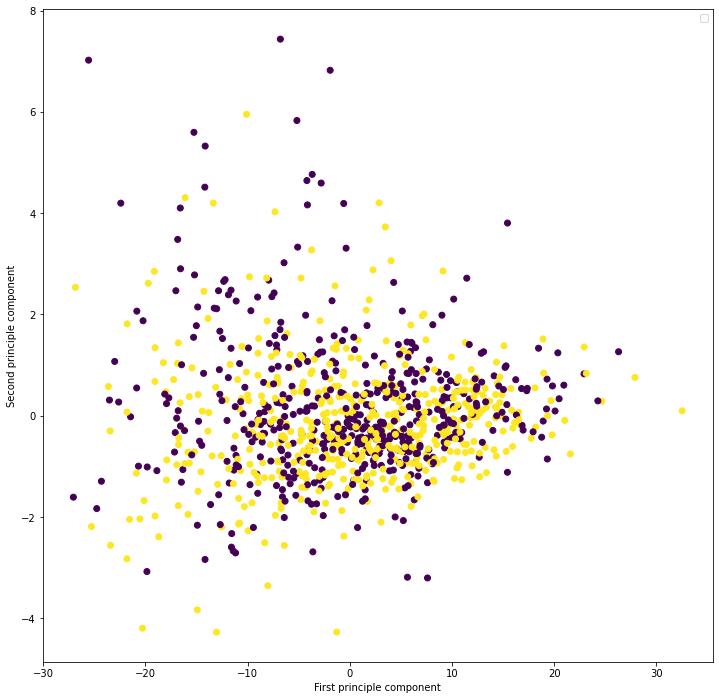

In [100]:
plt.figure(figsize=(12,12))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y)
plt.xlabel('First principle component')
plt.ylabel('Second principle component')
plt.legend()

In [101]:
# Now applying BOW to see if any improvements

In [102]:
# Applying BoW
from sklearn.feature_extraction.text import CountVectorizer

In [103]:
cv = CountVectorizer()

In [114]:
from sklearn.model_selection import train_test_split

X_train1,X_test1,y_train1,y_test1 = train_test_split(df['review'],y,test_size=0.2,random_state=1)

In [115]:
X_train_bow = cv.fit_transform(X_train1)
X_test_bow = cv.transform(X_test1)

In [116]:
X_train_bow = X_train_bow.toarray()
X_test_bow = X_test_bow.toarray()

In [118]:
X_test_bow.shape

(200, 15935)

In [121]:
scaled_data1 = scaler.fit_transform(X_train_bow)

In [130]:
x_pca1  = pca.fit_transform(X_train_bow)

In [131]:
x_pca1

array([[-1.10340955, -1.90195656],
       [-0.99012754, -2.18925932],
       [-1.5995839 ,  0.95122682],
       ...,
       [-2.3936759 , -0.37474104],
       [-1.75152697, -1.17563059],
       [ 0.7224932 ,  0.89129244]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


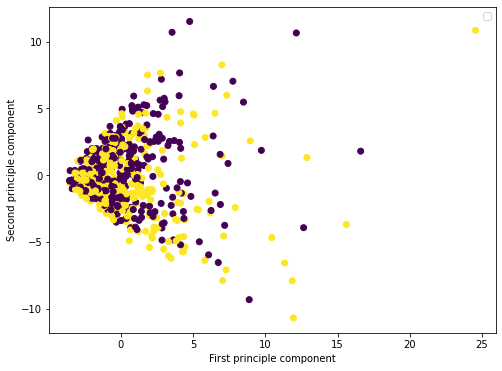

In [132]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca1[:,0],x_pca1[:,1],c=y_train1,)
plt.xlabel('First principle component')
plt.ylabel('Second principle component')
plt.legend()

In [133]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train_bow,y_train)
y_pred4 = rf.predict(X_test_bow)
accuracy_score(y_test,y_pred4)

0.835

Dramatic Increase in the accuracy above